<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-11-15 13:38:27--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  57.4MB/s    in 3.6s    

2025-11-15 13:38:32 (55.8 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [16]:
conn = sqlite3.connect('survey-data.sqlite')
df_main = pd.read_sql_query("SELECT * FROM main", conn)
print(df_main.shape)


(65437, 114)


## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


Using comp column: CompTotal


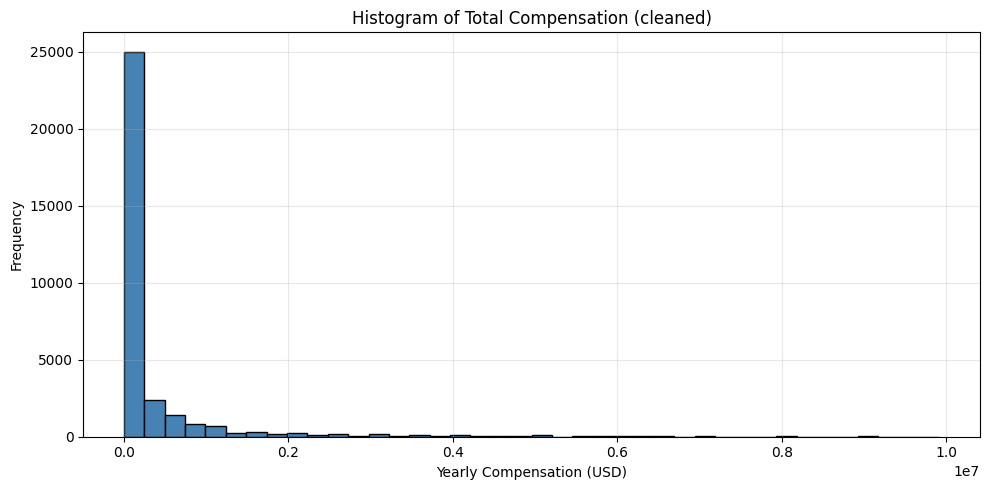

In [21]:
# 1.1 Histogram of Total Compensation (cleaned)
import pandas as pd, numpy as np, matplotlib.pyplot as plt, sqlite3, os

# ensure df_main
if 'df_main' not in globals():
    df_main = pd.read_sql_query("SELECT * FROM main", conn)

# detect comp column
comp_candidates = [c for c in df_main.columns if "comp" in c.lower()]
if not comp_candidates:
    raise RuntimeError("No compensation-like column found. Print df_main.columns to inspect.")
comp_col = comp_candidates[0]
print("Using comp column:", comp_col)

# clean values
s = df_main[comp_col].astype(str).str.replace(r"[\$,]", "", regex=True).str.replace(r"[^\d\.\-eE]", "", regex=True)
comp = pd.to_numeric(s, errors='coerce')
# reasonable range 1..10,000,000
comp = comp[(comp>0) & (comp<1e7)].dropna()

plt.figure(figsize=(10,5))
plt.hist(comp, bins=40, color="steelblue", edgecolor="black")
plt.title("Histogram of Total Compensation (cleaned)")
plt.xlabel("Yearly Compensation (USD)")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


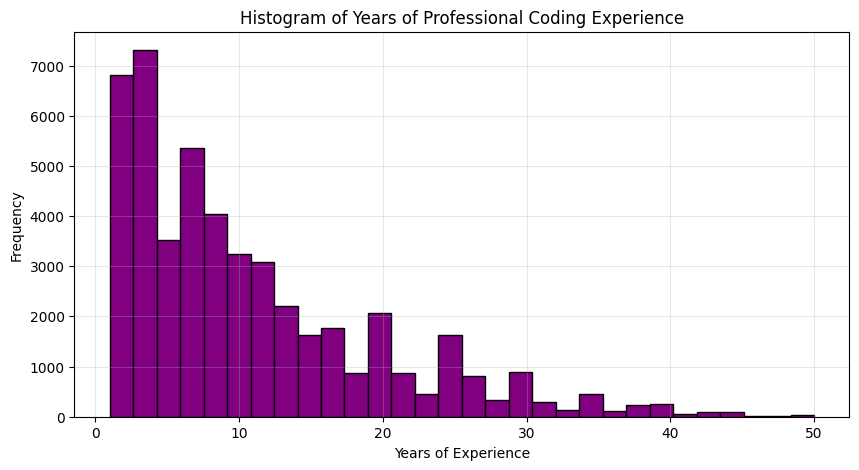

In [18]:
# 1.2 Histogram of YearsCodePro
import matplotlib.pyplot as plt

# clean & convert
exp = pd.to_numeric(df_main["YearsCodePro"], errors="coerce").dropna()

plt.figure(figsize=(10,5))
plt.hist(exp, bins=30, color="purple", edgecolor="black")
plt.title("Histogram of Years of Professional Coding Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()


### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


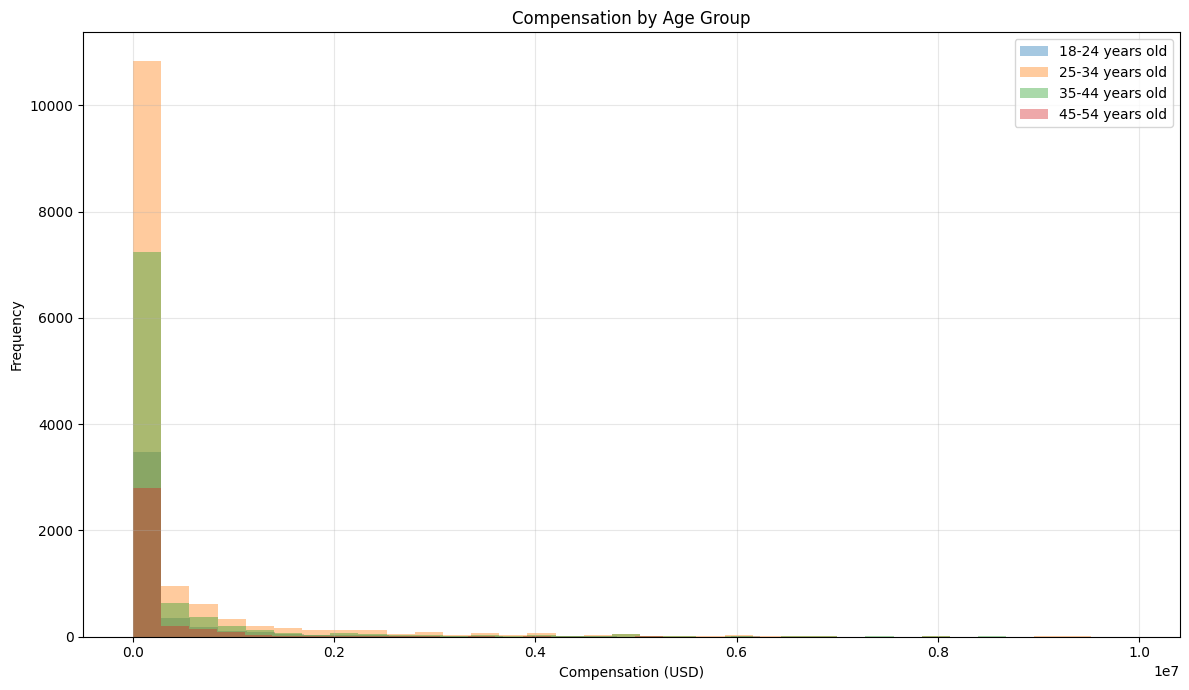

In [22]:
# 2.1 Histogram of Compensation by Age Group
import pandas as pd, matplotlib.pyplot as plt, numpy as np

if 'df_main' not in globals():
    df_main = pd.read_sql_query("SELECT * FROM main", conn)

age_groups = ["18-24 years old","25-34 years old","35-44 years old","45-54 years old"]
comp_candidates = [c for c in df_main.columns if "comp" in c.lower()]
if not comp_candidates:
    raise RuntimeError("No comp column found.")
comp_col = comp_candidates[0]

plt.figure(figsize=(12,7))
plotted = False
for ag in age_groups:
    subset = df_main[df_main["Age"].astype(str).str.strip()==ag]
    if subset.empty: 
        continue
    s = subset[comp_col].astype(str).str.replace(r"[\$,]", "", regex=True).str.replace(r"[^\d\.\-eE]", "", regex=True)
    comp = pd.to_numeric(s, errors='coerce')
    comp = comp[(comp>0)&(comp<1e7)].dropna()
    if comp.empty:
        continue
    plt.hist(comp, bins=35, alpha=0.4, label=ag)
    plotted = True

if plotted:
    plt.title("Compensation by Age Group")
    plt.xlabel("Compensation (USD)")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("No data plotted (missing Age or comp values).")


**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


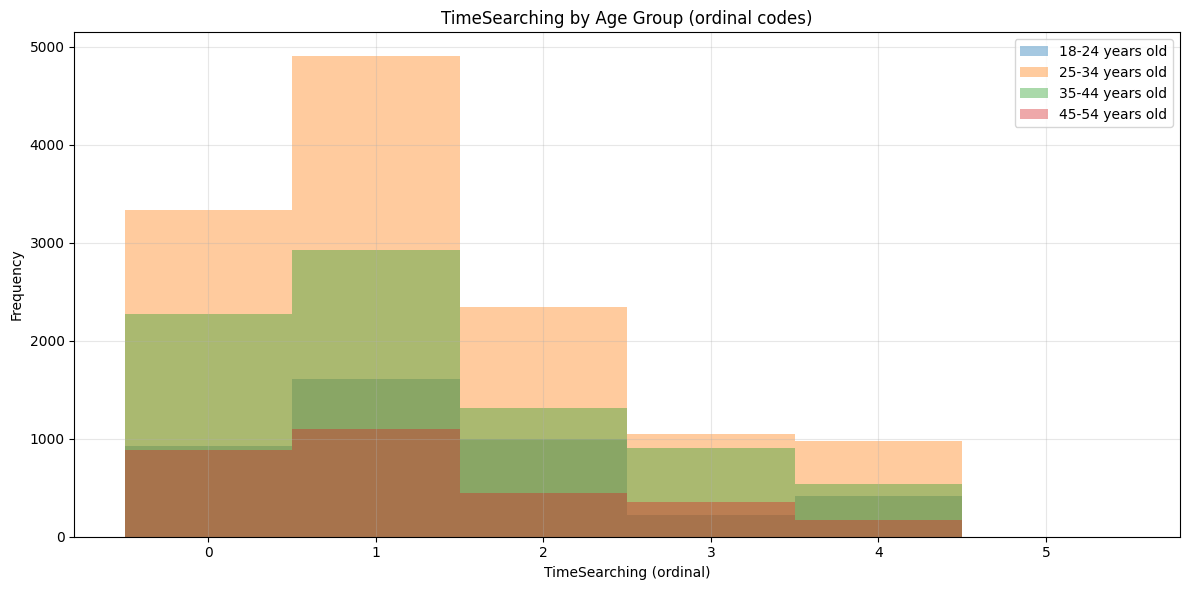

In [23]:
# 2.2 Histogram of TimeSearching by Age Group
import pandas as pd, matplotlib.pyplot as plt, numpy as np

if 'df_main' not in globals():
    df_main = pd.read_sql_query("SELECT * FROM main", conn)

if "TimeSearching" not in df_main.columns or "Age" not in df_main.columns:
    print("TimeSearching or Age column missing.")
else:
    age_groups = ["18-24 years old","25-34 years old","35-44 years old","45-54 years old"]
    def to_code(s):
        m = {
            "never":0,"rarely":1,"sometimes":2,"often":3,"daily":4,
            "less than once a month":0,"once a month":1,"several times a month":2,
            "several times a week":3,"every day":4
        }
        s2 = s.fillna("").astype(str).str.strip().str.lower()
        mapped = s2.map(m)
        if mapped.notna().sum()>0:
            return mapped
        return pd.Series(pd.Categorical(s).codes).replace(-1, np.nan)
    plt.figure(figsize=(12,6))
    plotted = False
    for ag in age_groups:
        sub = df_main[df_main["Age"].astype(str).str.strip()==ag]
        if sub.empty: continue
        codes = to_code(sub["TimeSearching"]).dropna().astype(float)
        if codes.empty: continue
        plt.hist(codes, bins=np.arange(-0.5,6,1), alpha=0.4, label=ag)
        plotted = True
    if plotted:
        plt.title("TimeSearching by Age Group (ordinal codes)")
        plt.xlabel("TimeSearching (ordinal)")
        plt.ylabel("Frequency")
        plt.legend()
        plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.show()
    else:
        print("No TimeSearching ordinal data plotted.")


### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


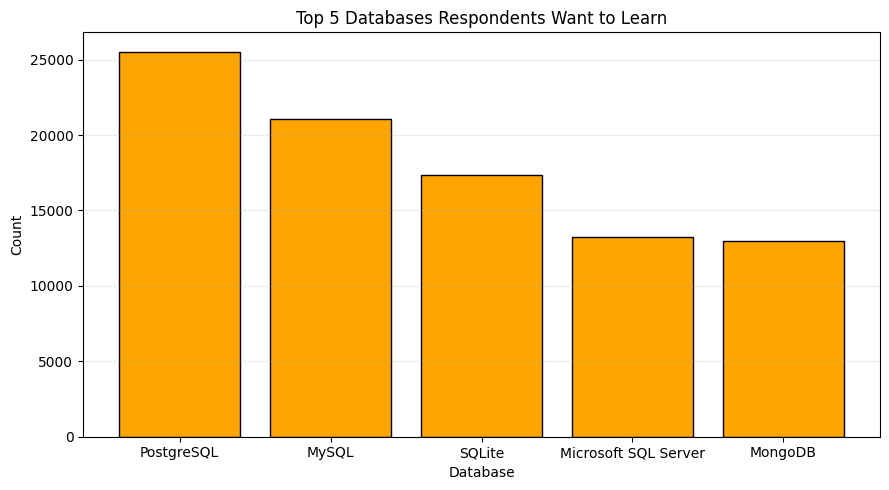

In [24]:
# 3.1 Histogram of Most Desired Databases (top 5)
import pandas as pd, matplotlib.pyplot as plt

if 'df_main' not in globals():
    df_main = pd.read_sql_query("SELECT * FROM main", conn)

candidates = [c for c in df_main.columns if "database" in c.lower() or "db" in c.lower()]
if not candidates:
    print("No database column found.")
else:
    db_col = candidates[0]
    split = df_main[db_col].dropna().astype(str).str.split(';')
    items = [it.strip() for sub in split for it in sub if it.strip()!=""]
    counts = pd.Series(items).value_counts()
    top5 = counts.head(5)
    plt.figure(figsize=(9,5))
    plt.bar(top5.index, top5.values, color="orange", edgecolor="black")
    plt.title("Top 5 Databases Respondents Want to Learn")
    plt.xlabel("Database")
    plt.ylabel("Count")
    plt.grid(axis='y', alpha=0.25)
    plt.tight_layout()
    plt.show()


**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


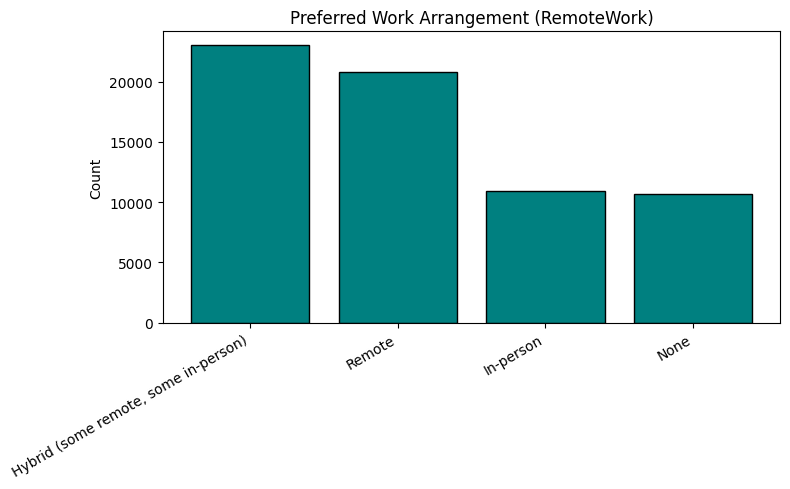

In [25]:
# 3.2 Histogram of RemoteWork preferences
import pandas as pd, matplotlib.pyplot as plt

if 'df_main' not in globals():
    df_main = pd.read_sql_query("SELECT * FROM main", conn)

if "RemoteWork" not in df_main.columns:
    print("RemoteWork column not found.")
else:
    counts = df_main["RemoteWork"].astype(str).value_counts()
    plt.figure(figsize=(8,5))
    plt.bar(counts.index, counts.values, color="teal", edgecolor="black")
    plt.xticks(rotation=30, ha='right')
    plt.title("Preferred Work Arrangement (RemoteWork)")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


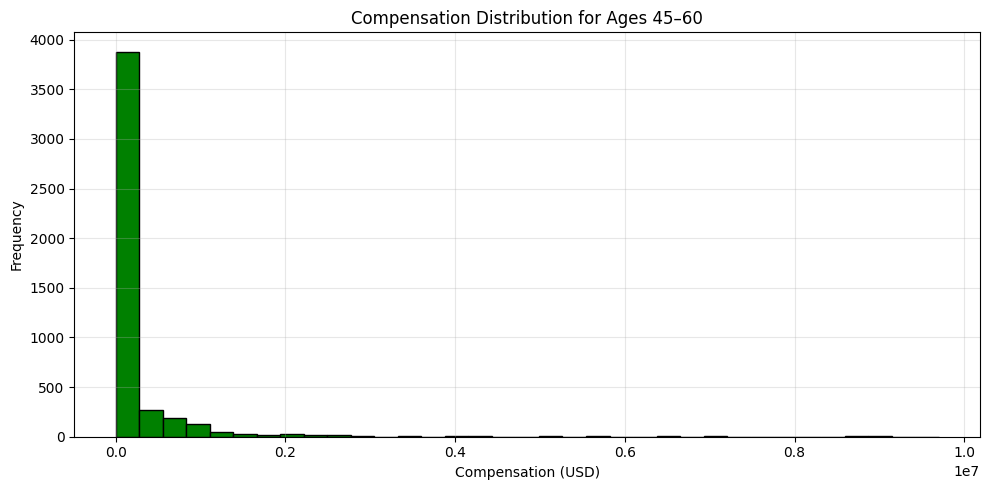

In [26]:
# 4.1 Histogram of Compensation for Ages 45-60
import pandas as pd, matplotlib.pyplot as plt

if 'df_main' not in globals():
    df_main = pd.read_sql_query("SELECT * FROM main", conn)

comp_candidates = [c for c in df_main.columns if "comp" in c.lower()]
if not comp_candidates or "Age" not in df_main.columns:
    print("Missing comp or Age column.")
else:
    comp_col = comp_candidates[0]
    targets = ["45-54 years old","55-64 years old"]
    subset = df_main[df_main["Age"].astype(str).isin(targets)]
    s = subset[comp_col].astype(str).str.replace(r"[\$,]", "", regex=True).str.replace(r"[^\d\.\-eE]", "", regex=True)
    comp = pd.to_numeric(s, errors='coerce')
    comp = comp[(comp>0)&(comp<1e7)].dropna()
    if comp.empty:
        print("No cleaned comp values for 45-60.")
    else:
        plt.figure(figsize=(10,5))
        plt.hist(comp, bins=35, color="green", edgecolor="black")
        plt.title("Compensation Distribution for Ages 45–60")
        plt.xlabel("Compensation (USD)")
        plt.ylabel("Frequency")
        plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.show()


**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


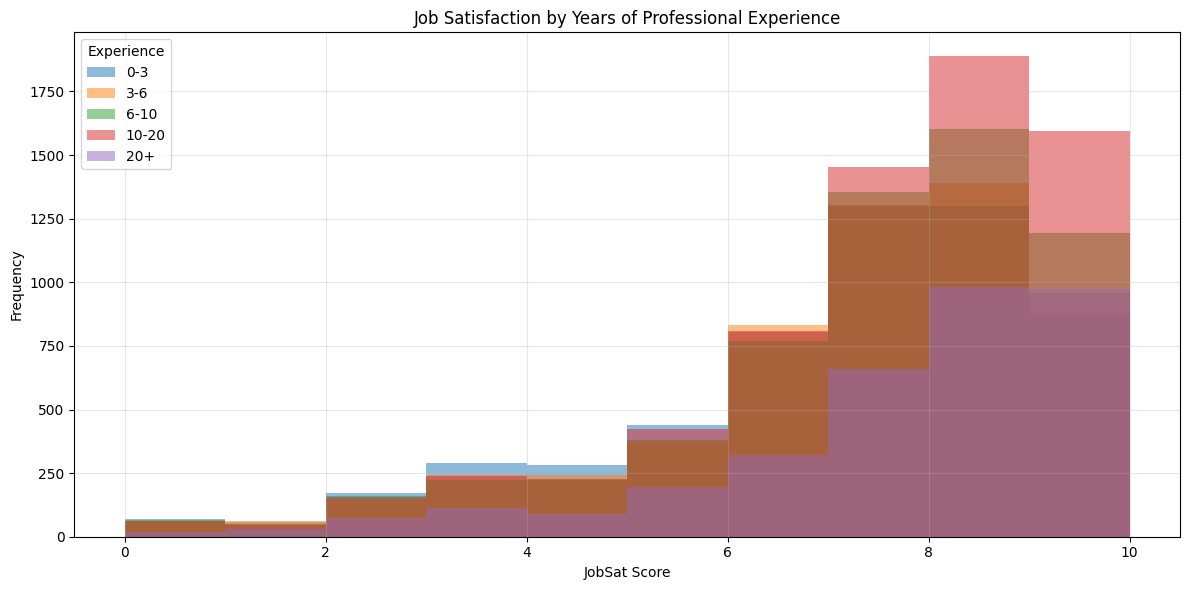

In [27]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np

if 'df_main' not in globals():
    df_main = pd.read_sql_query("SELECT * FROM main", conn)

if "JobSat" not in df_main.columns:
    print("JobSat not present.")
else:
    
    jobsat = pd.to_numeric(df_main["JobSat"], errors='coerce')
    if "YearsCodePro" in df_main.columns:
        yrs = df_main["YearsCodePro"].astype(str).str.replace("Less than 1","0").str.replace("More than 50","50")
        yrsnum = pd.to_numeric(yrs, errors='coerce')
        bins = [0,3,6,10,20,100]
        labels = ["0-3","3-6","6-10","10-20","20+"]
        df_main["ExpBucket"] = pd.cut(yrsnum, bins=bins, labels=labels, include_lowest=True)
        plt.figure(figsize=(12,6))
        plotted = False
        for lab in labels:
            sub = df_main[df_main["ExpBucket"]==lab]
            js = pd.to_numeric(sub["JobSat"], errors='coerce').dropna()
            if len(js)>0:
                plt.hist(js, bins=10, alpha=0.5, label=lab)
                plotted = True
        if plotted:
            plt.title("Job Satisfaction by Years of Professional Experience")
            plt.xlabel("JobSat Score")
            plt.ylabel("Frequency")
            plt.legend(title="Experience")
            plt.grid(alpha=0.3)
            plt.tight_layout()
            plt.show()
        else:
            print("No numeric JobSat values by experience bucket.")
    else:
        # fallback: overall JobSat
        js = pd.to_numeric(df_main["JobSat"], errors='coerce').dropna()
        if not js.empty:
            plt.figure(figsize=(10,5))
            plt.hist(js, bins=10, color="brown", edgecolor="black")
            plt.title("Job Satisfaction (All respondents)")
            plt.xlabel("JobSat Score")
            plt.ylabel("Frequency")
            plt.grid(alpha=0.3)
            plt.tight_layout()
            plt.show()
        else:
            print("JobSat present but no numeric values.")


### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [ ]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
